In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("Yearly grandprixs reports/grandprix_database.csv", na_values= [-1, "unknown"])
list(df)


['Position',
 'Number',
 'Driver',
 'Constructor',
 'Laps',
 'Total time',
 'Grid',
 'Points',
 'DriverID',
 'NPitstops',
 'MedianPitStopDuration',
 'Season',
 'Place']

In [34]:
df = pd.read_csv("Yearly grandprixs reports/grandprix_database.csv")
df

Position  Number            Driver  \
0          1.0       9    Kimi Räikkönen   
1          2.0       5   Fernando Alonso   
2          3.0       1  Sebastian Vettel   
3          4.0       3     Jenson Button   
4          5.0      18  Pastor Maldonado   
...        ...     ...               ...   
5018      16.0      77   Valtteri Bottas   
5019      17.0      24       Zhou Guanyu   
5020      18.0      20   Kevin Magnussen   
5021      19.0       2    Logan Sargeant   
5022       NaN      18      Lance Stroll   

                                 Constructor  Laps         Total time  Grid  \
0                       ['Lotus', 'Renault']    55           6358.667     4   
1                                ['Ferrari']    55           6359.519     6   
2                    ['Red Bull', 'Renault']    55            6362.83    PL   
3                    ['McLaren', 'Mercedes']    55  6366.454000000001     5   
4                    ['Williams', 'Renault']    55           6371.674     3   
...                                      ...   ...                ...   ...   
5018               ['Alfa Romeo', 'Ferrari']    19            1955.25  18.0   
5019               ['Alfa Romeo', 'Ferrari']    19           1958.821  15.0   
5020                     ['Haas', 'Ferrari']    19           1961.971  17.0   
5021                ['Williams', 'Mercedes']    19           1962.298  20.0   
5022  ['Aston Martin', 'Aramco', 'Mercedes']    16             Brakes  14.0   

      Points   DriverID  NPitstops  MedianPitStopDuration  Season  \
0       25.0  raikkonen          2                21.4635    2012   
1       18.0     alonso          3                20.1360    2012   
2       15.0     vettel          2                21.2975    2012   
3       12.0     button          3                20.5630    2012   
4       10.0  maldonado          2                21.3990    2012   
...      ...        ...        ...                    ...     ...   
5018     0.0    unknown         -1                -1.0000    2023   
5019     0.0    unknown         -1                -1.0000    2023   
5020     0.0    unknown         -1                -1.0000    2023   
5021     0.0    unknown         -1                -1.0000    2023   
5022     0.0    unknown         -1                -1.0000    2023   

              Place  
0         Abu_Dhabi  
1         Abu_Dhabi  
2         Abu_Dhabi  
3         Abu_Dhabi  
4         Abu_Dhabi  
...             ...  
5018  United_States  
5019  United_States  
5020  United_States  
5021  United_States  
5022  United_States  

[5023 rows x 13 columns]

Mejores Pilotos

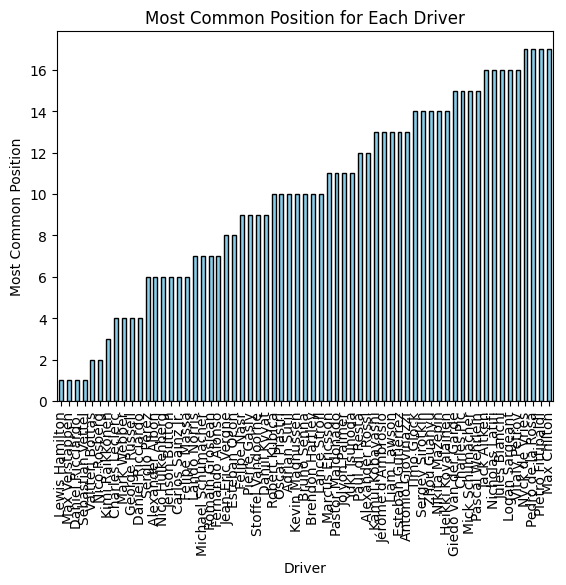

In [35]:
import matplotlib.pyplot as plt
df['Total time'] = pd.to_numeric(df['Total time'], errors='coerce')
df = df.dropna(subset=['Total time'])
# Calcular la posición más común para cada conductor
posicion_mas_comun = df.groupby('Driver')['Position'].agg(lambda x: x.value_counts().idxmax()).sort_values()
# Crear un gráfico de barras
posicion_mas_comun.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Driver')
plt.ylabel('Most Common Position')
plt.title('Most Common Position for Each Driver')
plt.show()

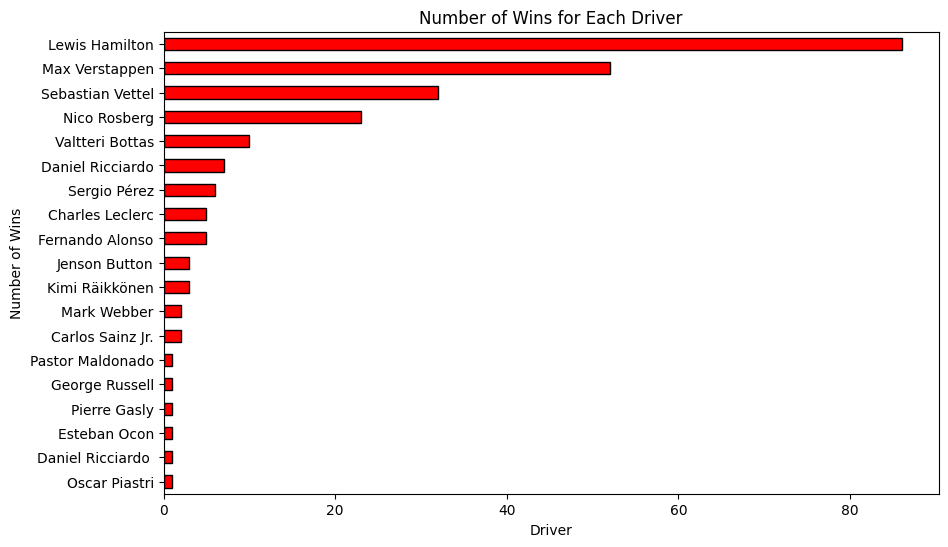

In [36]:
victorias_por_conductor = df[df['Position'] == 1]['Driver'].value_counts(ascending=True)

# Especificar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras
victorias_por_conductor.plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Each Driver')
plt.show()

In [37]:
df[df['Position'] == 1].groupby("Season")['Driver'].max()

Season
2012    Sebastian Vettel
2013    Sebastian Vettel
2014        Nico Rosberg
2015    Sebastian Vettel
2016        Nico Rosberg
2017     Valtteri Bottas
2018    Sebastian Vettel
2019     Valtteri Bottas
2020     Valtteri Bottas
2021     Valtteri Bottas
2022        Sergio Pérez
2023        Sergio Pérez
Name: Driver, dtype: object

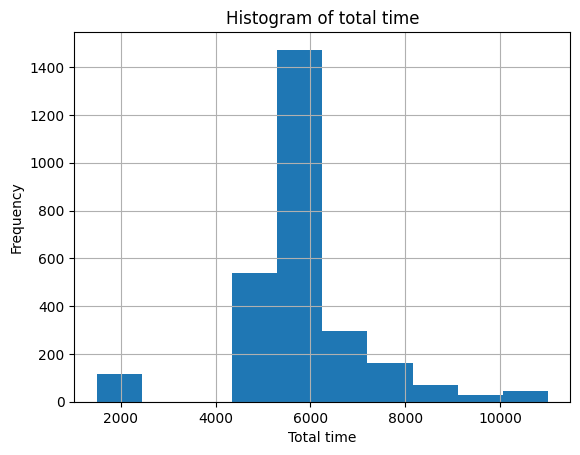

In [39]:
df["Total time"].hist()
plt.title("Histogram of total time")
plt.xlabel("Total time")
plt.ylabel("Frequency")
plt.show()

17           Engine
18        Collision
19        Collision
22        Collision
23        Collision
           ...     
4978       Accident
4979    Overheating
4980        Gearbox
4982       Withdrew
5022         Brakes
Name: Total time, Length: 605, dtype: object


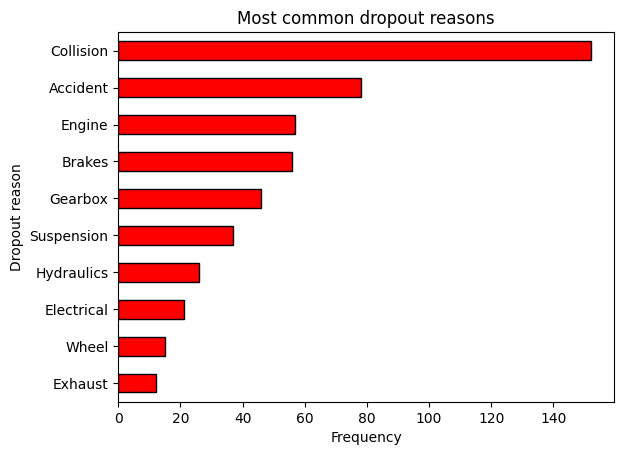

In [61]:
df_clean = pd.read_csv("Yearly grandprixs reports/grandprix_database.csv")

columna_filtrada = df_clean.loc[df_clean['Total time'].astype(str).str.isalpha(),"Total time"]
print(columna_filtrada)
columna_filtrada.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Dropout reason')
plt.title('Most common dropout reasons')
plt.show()



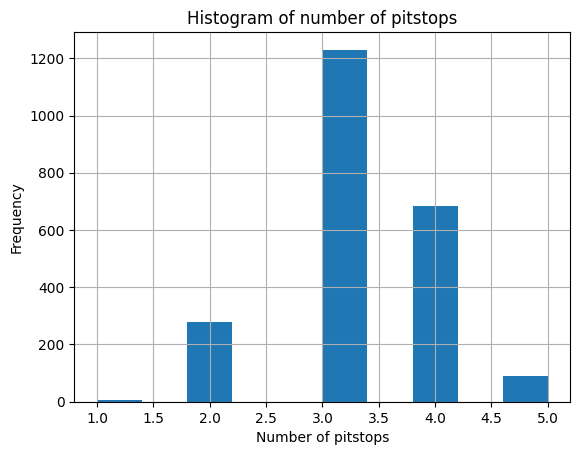

In [63]:
df_clean[df_clean["NPitstops"] != -1]["NPitstops"].hist()
plt.title("Histogram of number of pitstops")
plt.xlabel("Number of pitstops")
plt.ylabel("Frequency")
plt.show()

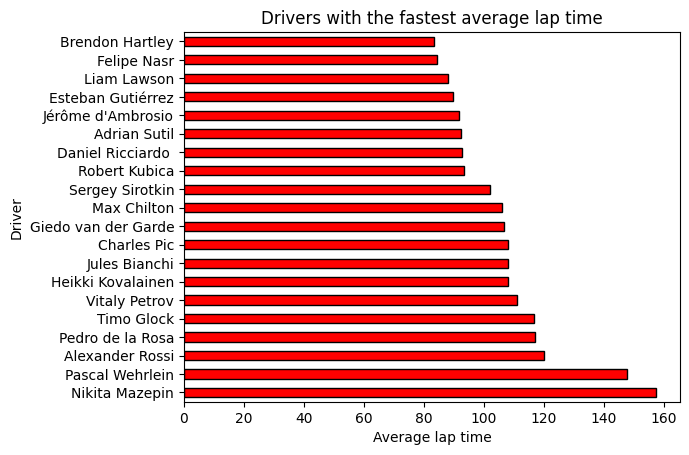

In [ ]:
df['Total time'] = pd.to_numeric(df['Total time'], errors='coerce')
df = df.dropna(subset=['Total time'])
df["Tiempo medio por vuelta"] = df["Total time"]/df["Laps"]
df.groupby("Driver")["Tiempo medio por vuelta"].min().sort_values(ascending=False).head(20).plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Average lap time')
plt.ylabel('Driver')
plt.title('Drivers with the fastest average lap time')
plt.show()


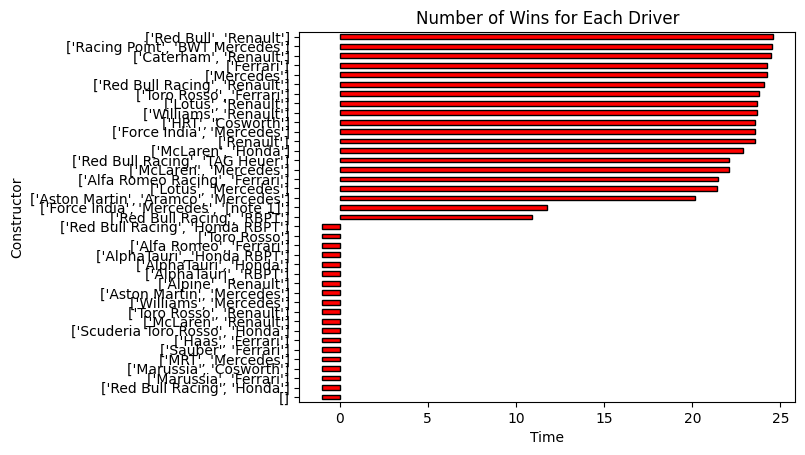

In [ ]:
df.groupby("Constructor")["MedianPitStopDuration"].median().sort_values(ascending=True).dropna().plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Constructor')
plt.title('Number of Wins for Each Driver')
plt.show()

In [ ]:
df['MedianPitStopDuration']

0       21.4635
1       20.1360
2       21.2975
3       20.5630
4       21.3990
         ...   
5017    26.7170
5018    -1.0000
5019    -1.0000
5020    -1.0000
5021    -1.0000
Name: MedianPitStopDuration, Length: 2725, dtype: float64

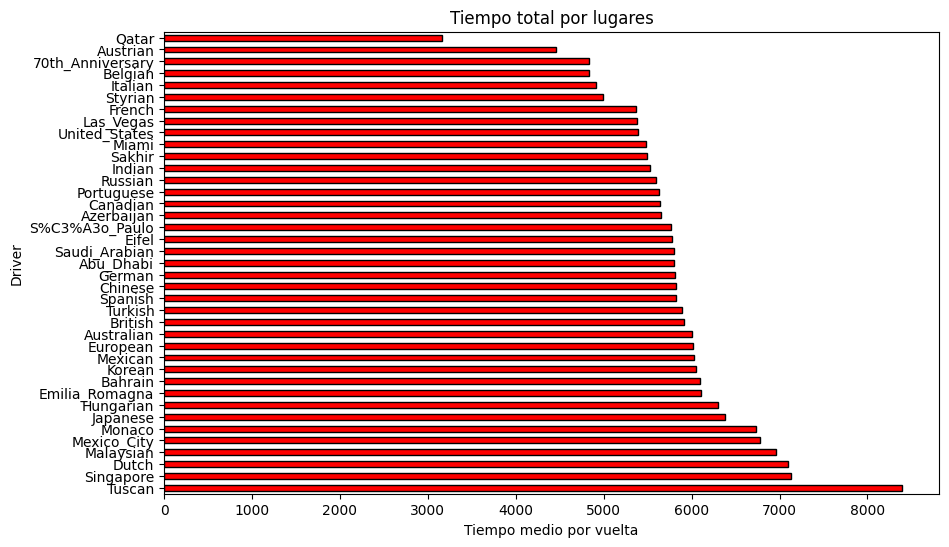

In [ ]:
df['Total time'] = pd.to_numeric(df['Total time'], errors='coerce')
df = df.dropna(subset=['Total time'])
plt.figure(figsize=(10, 6))
df.groupby("Place")["Total time"].mean().sort_values(ascending=False).plot(kind='barh', color='red', edgecolor='black')
plt.xlabel('Average time per lap by place')
plt.ylabel('Race place')
plt.title('Time per lap')
plt.show()

In [ ]:
#Mejores pilotos por temporada
df[df['Position'] == 1].groupby("Season")["Driver"].max()

Season
2012    Sebastian Vettel
2013    Sebastian Vettel
2014        Nico Rosberg
2015    Sebastian Vettel
2016        Nico Rosberg
2017     Valtteri Bottas
2018    Sebastian Vettel
2019     Valtteri Bottas
2020     Valtteri Bottas
2021     Valtteri Bottas
2022        Sergio Pérez
2023        Sergio Pérez
Name: Driver, dtype: object

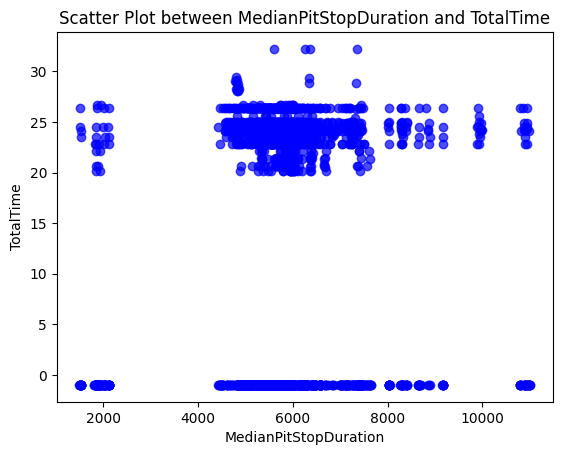

In [ ]:
df['Total time'] = pd.to_numeric(df['Total time'], errors='coerce')
df = df.dropna(subset=['Total time', "MedianPitStopDuration"])
plt.scatter(df['Total time'],df['MedianPitStopDuration'], color='blue', alpha=0.7)
plt.title('Scatter Plot between MedianPitStopDuration and TotalTime')
plt.xlabel('MedianPitStopDuration')
plt.ylabel('TotalTime')
plt.show()

In [ ]:
valores_float_total_time = pd.to_numeric(df['Total time'], errors='coerce')
valores_float_total_time = valores_float_total_time.dropna()

print(valores_float_total_time)

0       6358.667
1       6359.519
2       6362.830
3       6366.454
4       6371.674
          ...   
5017    1947.499
5018    1955.250
5019    1958.821
5020    1961.971
5021    1962.298
Name: Total time, Length: 2725, dtype: float64


In [ ]:
#PRIMERO IMPUTAMOS LOS DATOS FALTANTES
df["NPitstops"] = df["NPitstops"].fillna(df["NPitstops"].mode().values[0]) #Imputación por moda
df["MedianPitStopDuration"] = df["MedianPitStopDuration"].fillna(df["MedianPitStopDuration"].median()) #Imputación por mediana